# Combining two Excel sheets of data

## Combining Chronostratigraphic data into hydrocarbon source well data

#### Import modules and Excel file with multiple sheets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filepath = r'./data/RE_data_chronostrat_combine.xlsx'

### Functions to import and load xlsx data sheets

In [3]:
def create_xl_object(filepath):
    """Import .xlsx file with one or more sheets and create ExcelFile object"""
    global xldata
    
    xldata = pd.ExcelFile(filepath)
    
    return xldata
    

def load_all_sheets(filepath):
    """
    Load all sheets into a dictionary DataFrame
    The keys are the name of the sheets
    """
    global df
    
    xldata = create_xl_object(filepath)
        
    dict_file_of_all_sheets = {}
    for sheet in xldata.sheet_names:
        dict_file_of_all_sheets[f'{sheet}'] = xldata.parse(sheet)
        
    return dict_file_of_all_sheets


def output_to_excel(df):
    """Set index, name df to well name, remove well name column"""        
    
    df.to_excel("_output.xlsx")
    
    

In [4]:
def main(filepath):
    """Run the import and load all sheets
    Returns a DataFrame dictionary
    """
    
    dict_file = load_all_sheets(filepath)
    
    return dict_file

In [5]:
def re_logs(top_depth, bottom_depth):    
    
    logs = Well21[ (Well21['Depth m RKB'] >= top_depth) & (Well21['Depth m RKB'] <= bottom_depth) ]
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(15,15), sharey=True)
    fig.suptitle("6406/2-1", fontsize=22)
    fig.subplots_adjust(top=0.9,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
# 1st track: Tmax
    
    ax01=ax[0].twiny()
    ax01.grid(True)
    ax01.set_xlim(Well21['tmax'].min(), Well21['tmax'].max())
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel('tmax')
    ax01.scatter(logs['tmax'], logs['Depth m RKB'], label='tmax', color='blue')
    ax01.set_xlabel('tmax', color='blue')    
    ax01.tick_params(axis='x', colors='blue')

# 2nd track: s1
    
    ax02=ax[1].twiny()
    ax02.grid(True)
    ax02.set_xlim(Well21['s1'].min(), Well21['s1'].max())
    ax02.spines['top'].set_position(('outward',0))
    ax02.set_xlabel('s1')
    ax02.scatter(logs['s1'], logs['Depth m RKB'], label='s1', color='red')
    ax02.set_xlabel('s1', color='red')    
    ax02.tick_params(axis='x', colors='red')
    
# 3rd track: s2
    
    ax03=ax[2].twiny()
    ax03.grid(True)
    ax03.set_xlim(Well21['s2'].min(), Well21['s2'].max())
    ax03.spines['top'].set_position(('outward',0))
    ax03.set_xlabel('s2')
    ax03.scatter(logs['s2'], logs['Depth m RKB'], label='s2', color='green', marker='o')
    ax03.set_xlabel('s2', color='green')    
    ax03.tick_params(axis='x', colors='green')
    
# 4th track: s3
    
    ax04=ax[3].twiny()
    ax04.grid(True)
    ax04.set_xlim(Well21['s3'].min(), Well21['s3'].max())
    ax04.spines['top'].set_position(('outward',0))
    ax04.set_xlabel('s3')
    ax04.scatter(logs['s3'], logs['Depth m RKB'], label='s3', color='orange')
    ax04.set_xlabel('s3', color='orange')    
    ax04.tick_params(axis='x', colors='orange')
    
# 5th track: toc
    
    ax05=ax[4].twiny()
    ax05.grid(True)
    ax05.set_xlim(Well21['toc'].min(), Well21['toc'].max())
    ax05.spines['top'].set_position(('outward',0))
    ax05.set_xlabel('toc')
    ax05.scatter(logs['toc'], logs['Depth m RKB'], label='toc', color='black')
    ax05.set_xlabel('toc', color='black')    
    ax05.tick_params(axis='x', colors='black')

# 6th track: HI
    
    ax06=ax[5].twiny()
    ax06.grid(True)
    ax06.set_xlim(Well21['HI'].min(), Well21['HI'].max())
    ax06.spines['top'].set_position(('outward',0))
    ax06.set_xlabel('HI')
    ax06.scatter(logs['HI'], logs['Depth m RKB'], label='HI', color='purple')
    ax06.set_xlabel('HI', color='purple')    
    ax06.tick_params(axis='x', colors='purple')
    
# 7th track: pi
    
    ax07=ax[6].twiny()
    ax07.grid(True)
    ax07.set_xlim(Well21['pi'].min(), Well21['pi'].max())
    ax07.spines['top'].set_position(('outward',0))
    ax07.set_xlabel('pi')
    ax07.scatter(logs['pi'], logs['Depth m RKB'], label='pi', color='brown')
    ax07.set_xlabel('pi', color='brown')    
    ax07.tick_params(axis='x', colors='brown')

In [6]:
df = main(filepath)

In [7]:
len(df.keys())

2

In [8]:
merge = pd.merge(df[list(df.keys())[0]],df[list(df.keys())[1]])

### Merge two datasets

#### Cleanup

In [9]:
merge = merge[ (merge['Depth m RKB'] > merge['Top_depth_m']) & (merge['Depth m RKB'] <= merge['Base_depth_m']) ]

merge.drop(['Top_depth_m', 'Base_depth_m', 'Thickness_m','Top_age_Ma', 'Bottom_age_Ma'], axis=1, inplace=True)

merge.index = pd.RangeIndex(len(merge.index))

In [10]:
merge_columns = ['Well', 'Depth m RKB', 'Formation (NPD)', 'Period', 'Type of measurement',
                 'samplith', 'tmax', 's1', 's2', 's3', 'toc', 'HI', 'pi', 'company_name']

In [11]:
merge = merge.reindex(columns=merge_columns)

###### Look for missing data in rows and columns

In [12]:
#Show missing entries
def num_missing(x):
  return sum(x.isnull())

In [13]:
#Applying per column:
print ("Missing values per column:")
print (df['Chronostrat'].apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (df['Chronostrat'].apply(num_missing, axis=1).head()) #axis=1 row

#Applying per column:
print ("Missing values per column:")
print (df['RE data'].apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (df['RE data'].apply(num_missing, axis=1).head()) #axis=1 row

Missing values per column:
Well             0
Period           0
Top_depth_m      0
Base_depth_m     0
Thickness_m      0
Top_age_Ma       0
Bottom_age_Ma    0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64
Missing values per column:
Well                    0
Depth m RKB             0
Formation (NPD)         0
Type of measurement     0
samplith                0
tmax                    7
s1                      0
s2                      0
s3                     31
toc                     0
HI                      0
pi                      0
company_name            0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


#### The redata has null values in the 'tmax' and 's3' columns

#### Edit missing data

In [14]:
merge[merge.isnull().any(axis=1)]

,Well,Depth m RKB,Formation (NPD),Period,Type of measurement,samplith,tmax,s1,s2,s3,toc,HI,pi,company_name
75,406/2-1,3417.0,SING FM,UPPER TURONIAN,SWC,SH,436.0,0.29,1.18,NaN,1.06,111,0.20,SAGA(SAGA)
76,406/2-1,3420.0,SING FM,UPPER TURONIAN,SWC,SH/SST,437.0,0.97,3.74,NaN,1.46,256,0.21,SAGA(SAGA)
81,406/2-1,3500.0,SING FM,LOWER TURONIAN,SWC,SH,434.0,0.39,1.79,NaN,1.13,158,0.18,SAGA(SAGA)
82,406/2-1,3508.0,SING FM,LOWER TURONIAN,SWC,SLT,438.0,0.26,1.32,NaN,0.91,145,0.16,SAGA(SAGA)
83,406/2-1,3514.0,SING FM,LOWER TURONIAN,SWC,SH,437.0,0.32,1.19,NaN,0.90,132,0.21,SAGA(SAGA)
91,406/2-1,3708.0,UP FM,LOWER TURONIAN,SWC,SH,440.0,0.30,1.23,NaN,0.85,145,0.20,SAGA(SAGA)
94,406/2-1,3721.0,UP FM,LOWER TURONIAN,SWC,SH,442.0,0.17,1.19,NaN,1.06,112,0.13,SAGA(SAGA)
100,406/2-1,3840.0,UP FM,LOWER TURONIAN,DC,CLYST/SH,NaN,0.26,0.07,0.09,0.17,41,0.79,GEOLABNOR(SAGA)
104,406/2-1,3920.0,UP FM,LOWER TURONIAN,DC,CLYST/SH,NaN,0.32,0.05,0.05,0.18,28,0.86,GEOLABNOR(SAGA)
105,406/2-1,3940.0,UP FM,LOWER TURONIAN,DC,CLYST/SH,NaN,0.42,0.13,0.15,0.14,93,0.76,GEOLABNOR(SAGA)


In [15]:
tops=('Gar Fm', 'Ise Fm', 'Kos Fm', 'Sing Fm', 'Lang Fm', 'Speck Fm', 'Milky Fm', 'Urn Fm')
tops_depths=(2503, 2672, 2848, 3415, 3442, 4371, 4381, 4417)

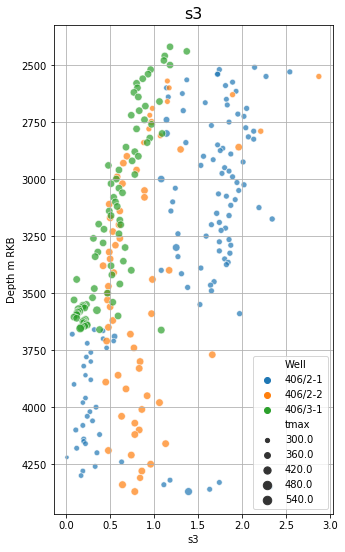

In [16]:
f, ax = plt.subplots(figsize=(5,9))
sns.scatterplot(y='Depth m RKB', x='s3', data=merge, hue='Well', size='tmax', alpha=0.7)

ax.invert_yaxis()
ax.grid(True)
ax.set_title('s3', fontsize=16)

plt.savefig('./images/s3_allwells',bbox_inches='tight')

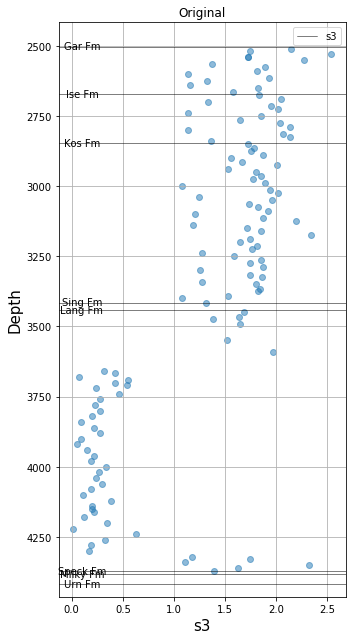

In [17]:
fig, ax = plt.subplots(figsize=(5,9))

ax.scatter(merge[ merge['Well'] == '406/2-1']['s3'], 
           merge[ merge['Well'] == '406/2-1']['Depth m RKB'], alpha=0.5)

for (i,j) in zip(tops_depths,tops):
            if ((i>=2500) and (i<=4500)):
                ax.axhline(y=i, linewidth=0.5, color='black')
                ax.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

ax.invert_yaxis()
ax.set_xlabel('s3', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Original')
ax.legend(['s3'])
ax.grid(True)
fig.tight_layout()

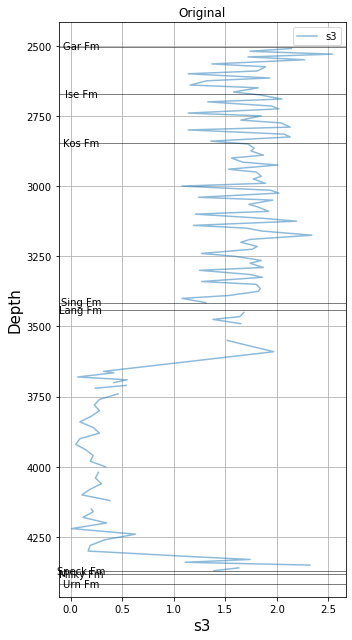

In [18]:
fig, ax = plt.subplots(figsize=(5,9))

ax.plot(merge[ merge['Well'] == '406/2-1']['s3'], merge[ merge['Well'] == '406/2-1']['Depth m RKB'], alpha=0.5)

for (i,j) in zip(tops_depths,tops):
            if ((i>=2500) and (i<=4500)):
                ax.axhline(y=i, linewidth=0.5, color='black')
                ax.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

ax.invert_yaxis()
ax.set_xlabel('s3', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Original')
ax.legend(['s3'])
ax.grid(True)
fig.tight_layout()

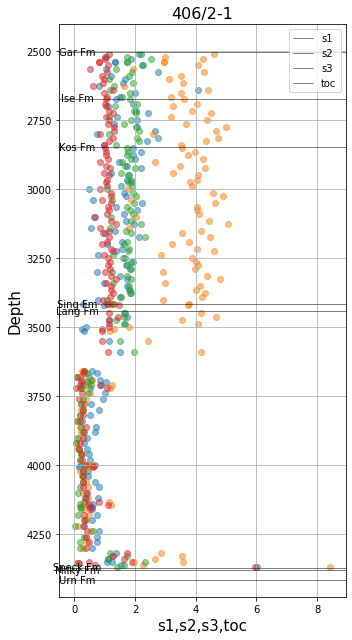

In [19]:
fig, ax = plt.subplots(figsize=(5,9))

ax.scatter(merge[ merge['Well'] == '406/2-1']['s1'], merge[ merge['Well'] == '406/2-1']['Depth m RKB'], alpha=0.5)
ax.scatter(merge[ merge['Well'] == '406/2-1']['s2'], merge[ merge['Well'] == '406/2-1']['Depth m RKB'], alpha=0.5)
ax.scatter(merge[ merge['Well'] == '406/2-1']['s3'], merge[ merge['Well'] == '406/2-1']['Depth m RKB'], alpha=0.5)
ax.scatter(merge[ merge['Well'] == '406/2-1']['toc'], merge[ merge['Well'] == '406/2-1']['Depth m RKB'], alpha=0.5)


for (i,j) in zip(tops_depths,tops):
            if ((i>=2500) and (i<=4500)):
                ax.axhline(y=i, linewidth=0.5, color='black')
                ax.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')


ax.invert_yaxis()
ax.set_xlabel('s1,s2,s3,toc', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('406/2-1', fontsize=16)
ax.legend(['s1','s2','s3','toc'])
ax.grid(True)
fig.tight_layout()

#plt.savefig('./images/s1s2s3toc',bbox_inches='tight')

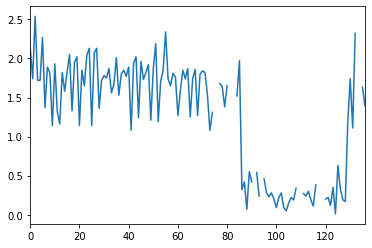

In [20]:
merge[ merge['Well'] == '406/2-1']['s3'].plot()

### Filling NaN values with averages taken from Well and Period

In [21]:
merge['s3'] = merge.groupby(['Well','Period'])['s3'].transform(lambda x: x.fillna(x.median()))
merge['tmax'] = merge.groupby(['Well','Period'])['tmax'].transform(lambda x: x.fillna(x.median()))

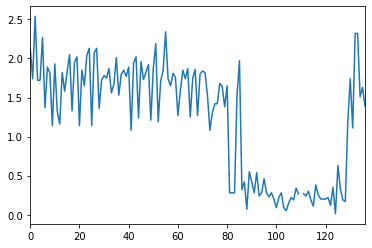

In [22]:
merge[ merge['Well'] == '406/2-1']['s3'].plot()

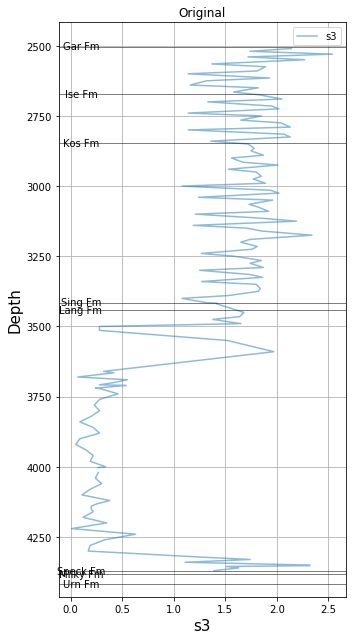

In [23]:
fig, ax = plt.subplots(figsize=(5,9))

ax.plot(merge[ merge['Well'] == '406/2-1']['s3'], merge[ merge['Well'] == '406/2-1']['Depth m RKB'], alpha=0.5)

for (i,j) in zip(tops_depths,tops):
            if ((i>=2500) and (i<=4500)):
                ax.axhline(y=i, linewidth=0.5, color='black')
                ax.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

ax.invert_yaxis()
ax.set_xlabel('s3', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Original')
ax.legend(['s3'])
ax.grid(True)
fig.tight_layout()

In [24]:
#Applying per column:
print ("Missing values per column:")
print (merge.apply(num_missing, axis=0)) #axis=0 column

#Applying per row:
print ("\nMissing values per row:")
print (merge.apply(num_missing, axis=1).head()) #axis=1 row

Missing values per column:
Well                   0
Depth m RKB            0
Formation (NPD)        0
Period                 0
Type of measurement    0
samplith               0
tmax                   0
s1                     0
s2                     0
s3                     4
toc                    0
HI                     0
pi                     0
company_name           0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [25]:
# merge.dropna(inplace=True)

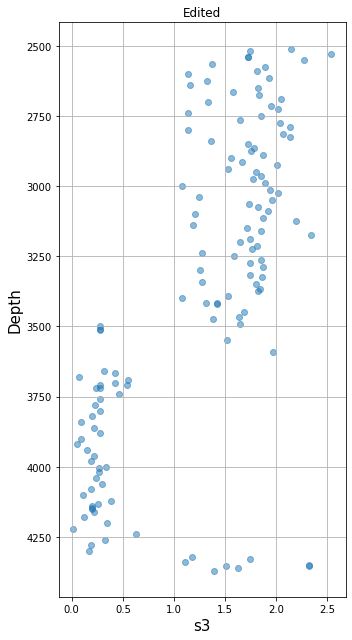

In [26]:
fig, ax = plt.subplots(figsize=(5,9))
ax.scatter(merge[ merge['Well'] == '406/2-1']['s3'], merge[ merge['Well'] == '406/2-1']['Depth m RKB'], alpha=0.5)

ax.invert_yaxis()
ax.set_xlabel('s3', fontsize=15)
ax.set_ylabel('Depth', fontsize=15)
ax.set_title('Edited')

ax.grid(True)
fig.tight_layout()

# BACKUP

In [27]:
# sns.pairplot(merge[ merge['Well'] == '406/2-1'])
# plt.savefig('./images/pair_plot',bbox_inches='tight')

In [28]:
Well21 = merge[ merge['Well'] == '406/2-1']

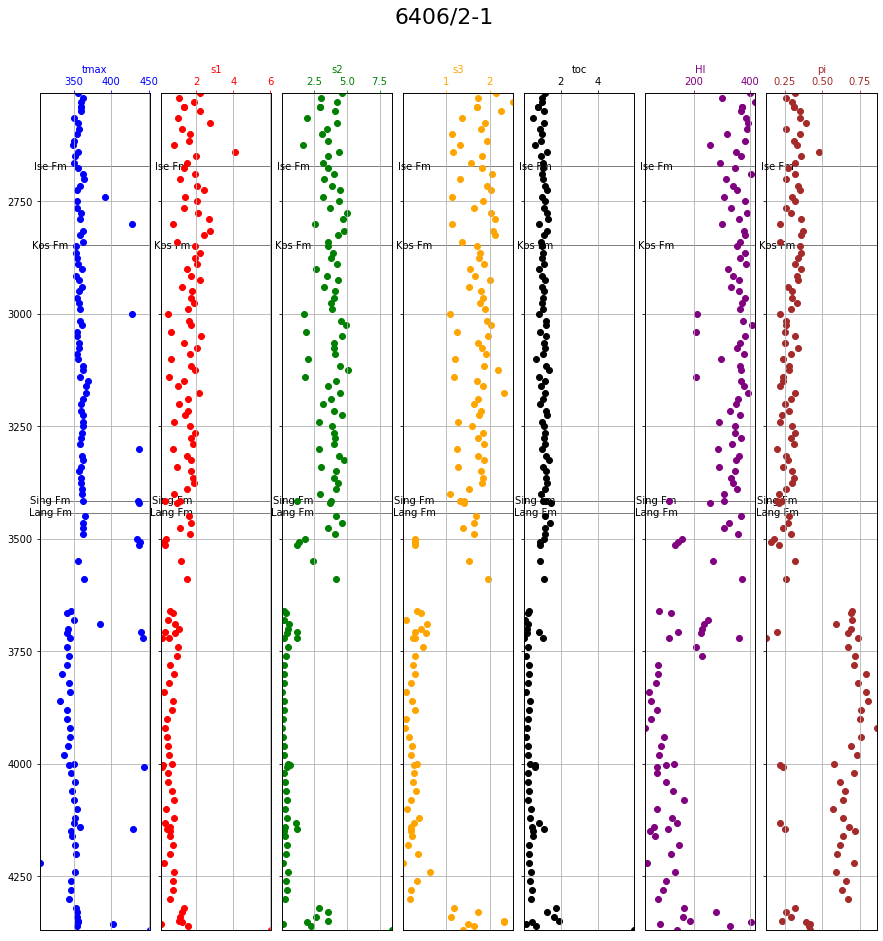

In [29]:
re_logs(Well21['Depth m RKB'].min(), Well21['Depth m RKB'].max())
# plt.savefig('./images/log_plot',bbox_inches='tight')

### Groupby well and Period showing each average value

In [30]:
merge.groupby(['Well','Period'])['tmax','s1','s2','s3','toc','HI','pi'].mean()

tmax         s1        s2        s3  \
Well    Period                                                           
406/2-1 APTIAN               356.000000   1.155000  2.780000  2.320000   
        CONIACIAN            364.040000   1.472400  3.826000  1.718400   
        HAUTERIVIAN          403.000000   2.550000  3.606667  1.510000   
        LOWER CAMPANIAN      367.333333   1.829167  3.980000  1.734167   
        LOWER CENOMANIAN     350.428571   0.554286  0.454286  0.249286   
        LOWER TURONIAN       363.913793   0.716897  1.052414  0.505862   
        MIDDLE ALBIAN        354.000000   1.240000  3.020000  1.343333   
        MIDDLE CAMPANIAN     354.000000   1.900000  3.422857  1.670000   
        MIDDLE CENOMANIAN    444.000000   0.140000  0.450000       NaN   
        SANTONIAN            360.555556   1.646667  3.711111  1.731667   
        UPPER ALBIAN         352.818182   0.602727  0.421818  0.238182   
        UPPER CAMPANIAN      357.600000   1.667000  3.466000  1.834000   
        UPPER CENOMANIAN     344.000000   0.460000  0.440000  0.265000   
        UPPER TURONIAN       387.000000   1.048333  3.333333  1.406667   
406/2-2 CENOMANIAN           432.166667  25.043333  3.183333  0.760000   
        CONIACIAN            429.727273  24.396364  3.530000  0.581818   
        LOWER ALBIAN         427.000000  33.565000  3.155000  0.740000   
        LOWER APTIAN         464.000000   5.373333  5.990000       NaN   
        LOWER CAMPANIAN      395.363636  12.453636  2.890909  1.143636   
        LOWER SANTONIAN      428.500000  15.956667  2.385000  0.725000   
        MIDDLE CENOMANIAN    424.125000  27.957500  3.168750  0.787500   
        MIDDLE TURONIAN      432.333333  26.862667  3.974000  0.600000   
        UPPER ALBIAN         434.000000  32.715000  4.260000  0.910000   
        UPPER CAMPANIAN      357.833333   1.756667  2.216667  1.535000   
        UPPER HAUTERIVIAN    436.000000  35.140000  3.160000  0.780000   
406/3-1 ALBIAN               439.184211   0.160526  0.321842  0.318421   
        BARREMIAN            460.750000   0.602500  2.910000  0.447500   
        DANIAN               423.000000   0.030000  0.270000  1.180000   
        LOWER CAMPANIAN      427.111111   0.066667  0.681111  0.950000   
        LOWER MAASTRICHTIAN  423.000000   0.040000  0.440000  1.370000   
        UPPER CRETACEOUS     430.566667   0.074333  0.627667  0.715333   

                                  toc          HI        pi  
Well    Period                                               
406/2-1 APTIAN               1.200000  295.000000  0.310000  
        CONIACIAN            1.117600  339.640000  0.272800  
        HAUTERIVIAN          2.256667  183.333333  0.416667  
        LOWER CAMPANIAN      1.130000  349.916667  0.304167  
        LOWER CENOMANIAN     0.388571  113.857143  0.578571  
        LOWER TURONIAN       0.516207  168.482759  0.554483  
        MIDDLE ALBIAN        1.550000  201.666667  0.290000  
        MIDDLE CAMPANIAN     0.987143  343.142857  0.341429  
        MIDDLE CENOMANIAN    0.630000   71.000000  0.240000  
        SANTONIAN            1.053889  347.888889  0.302778  
        UPPER ALBIAN         0.474545   88.454545  0.615455  
        UPPER CAMPANIAN      0.933000  371.600000  0.320000  
        UPPER CENOMANIAN     0.416667  102.666667  0.510000  
        UPPER TURONIAN       1.171667  283.666667  0.231667  
406/2-2 CENOMANIAN           1.603889  190.000000  0.833333  
        CONIACIAN            1.704545  207.363636  0.810000  
        LOWER ALBIAN         2.130000  147.500000  0.915000  
        LOWER APTIAN         6.096667   99.333333  0.476667  
        LOWER CAMPANIAN      1.242727  230.000000  0.563636  
        LOWER SANTONIAN      1.398333  165.333333  0.761667  
        MIDDLE CENOMANIAN    1.785000  162.000000  0.826250  
        MIDDLE TURONIAN      1.605333  238.800000  0.767333  
        UPPER ALBIAN         2.245000  191.000000  0.885000  
        UPPER CAMPANIAN      0.785000  284

### Groupby Period and well showing each average value

In [31]:
merge.groupby(['Period','Well'])['tmax','s1','s2','s3','toc','HI','pi'].mean()

tmax         s1        s2        s3  \
Period              Well                                                 
ALBIAN              406/3-1  439.184211   0.160526  0.321842  0.318421   
APTIAN              406/2-1  356.000000   1.155000  2.780000  2.320000   
BARREMIAN           406/3-1  460.750000   0.602500  2.910000  0.447500   
CENOMANIAN          406/2-2  432.166667  25.043333  3.183333  0.760000   
CONIACIAN           406/2-1  364.040000   1.472400  3.826000  1.718400   
                    406/2-2  429.727273  24.396364  3.530000  0.581818   
DANIAN              406/3-1  423.000000   0.030000  0.270000  1.180000   
HAUTERIVIAN         406/2-1  403.000000   2.550000  3.606667  1.510000   
LOWER ALBIAN        406/2-2  427.000000  33.565000  3.155000  0.740000   
LOWER APTIAN        406/2-2  464.000000   5.373333  5.990000       NaN   
LOWER CAMPANIAN     406/2-1  367.333333   1.829167  3.980000  1.734167   
                    406/2-2  395.363636  12.453636  2.890909  1.143636   
                    406/3-1  427.111111   0.066667  0.681111  0.950000   
LOWER CENOMANIAN    406/2-1  350.428571   0.554286  0.454286  0.249286   
LOWER MAASTRICHTIAN 406/3-1  423.000000   0.040000  0.440000  1.370000   
LOWER SANTONIAN     406/2-2  428.500000  15.956667  2.385000  0.725000   
LOWER TURONIAN      406/2-1  363.913793   0.716897  1.052414  0.505862   
MIDDLE ALBIAN       406/2-1  354.000000   1.240000  3.020000  1.343333   
MIDDLE CAMPANIAN    406/2-1  354.000000   1.900000  3.422857  1.670000   
MIDDLE CENOMANIAN   406/2-1  444.000000   0.140000  0.450000       NaN   
                    406/2-2  424.125000  27.957500  3.168750  0.787500   
MIDDLE TURONIAN     406/2-2  432.333333  26.862667  3.974000  0.600000   
SANTONIAN           406/2-1  360.555556   1.646667  3.711111  1.731667   
UPPER ALBIAN        406/2-1  352.818182   0.602727  0.421818  0.238182   
                    406/2-2  434.000000  32.715000  4.260000  0.910000   
UPPER CAMPANIAN     406/2-1  357.600000   1.667000  3.466000  1.834000   
                    406/2-2  357.833333   1.756667  2.216667  1.535000   
UPPER CENOMANIAN    406/2-1  344.000000   0.460000  0.440000  0.265000   
UPPER CRETACEOUS    406/3-1  430.566667   0.074333  0.627667  0.715333   
UPPER HAUTERIVIAN   406/2-2  436.000000  35.140000  3.160000  0.780000   
UPPER TURONIAN      406/2-1  387.000000   1.048333  3.333333  1.406667   

                                  toc          HI        pi  
Period              Well                                     
ALBIAN              406/3-1  0.774474   41.526316  0.305000  
APTIAN              406/2-1  1.200000  295.000000  0.310000  
BARREMIAN           406/3-1  2.197500   64.000000  0.345000  
CENOMANIAN          406/2-2  1.603889  190.000000  0.833333  
CONIACIAN           406/2-1  1.117600  339.640000  0.272800  
                    406/2-2  1.704545  207.363636  0.810000  
DANIAN              406/3-1  0.850000   32.000000  0.100000  
HAUTERIVIAN         406/2-1  2.256667  183.333333  0.416667  
LOWER ALBIAN        406/2-2  2.130000  147.500000  0.915000  
LOWER APTIAN        406/2-2  6.096667   99.333333  0.476667  
LOWER CAMPANIAN     406/2-1  1.130000  349.916667  0.304167  
                    406/2-2  1.242727  230.000000  0.563636  
                    406/3-1  0.847778   78.666667  0.091111  
LOWER CENOMANIAN    406/2-1  0.388571  113.857143  0.578571  
LOWER MAASTRICHTIAN 406/3-1  1.100000   40.000000  0.080000  
LOWER SANTONIAN     406/2-2  1.398333  165.333333  0.761667  
LOWER TURONIAN      406/2-1  0.516207  168.482759  0.554483  
MIDDLE ALBIAN       406/2-1  1.550000  201.666667  0.290000  
MIDDLE CAMPANIAN    406/2-1  0.987143  343.142857  0.341429  
MIDDLE CENOMANIAN   406/2-1  0.630000   71.000000  0.240000  
                    406/2-2  1.785000  162.000000  0.826250  
MIDDLE TURONIAN     406/2-2  1.605333  238.800000  0.767333  
SANTONIAN           406/2-1  1.053889  347.888889  0.302778  
UPPER ALBIAN        406/2-1  0.474545   88

### Correlation of two parameters (here, s1 - s2)

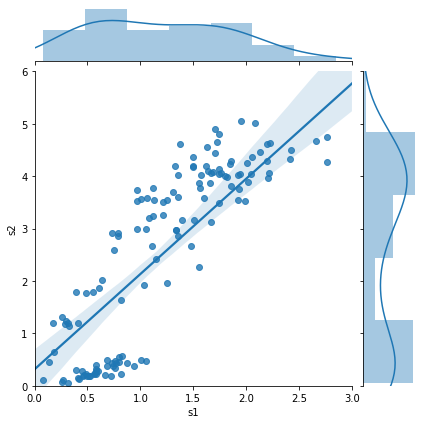

In [32]:
sns.jointplot(y='s2', x='s1', data=Well21, kind='reg', xlim=(0,3), ylim=(0,6))
plt.savefig('./images/jointplot-scatter',bbox_inches='tight')

### A 2D plot of s1 and s2 with 3 and 4 dimensions of well and HI

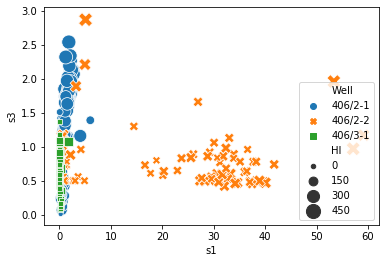

In [33]:
ax = sns.scatterplot(y='s3', x='s1', data=merge, hue='Well', style='Well', size='HI', sizes=(20,200))
plt.savefig('./images/scatterplot-bywell',bbox_inches='tight')

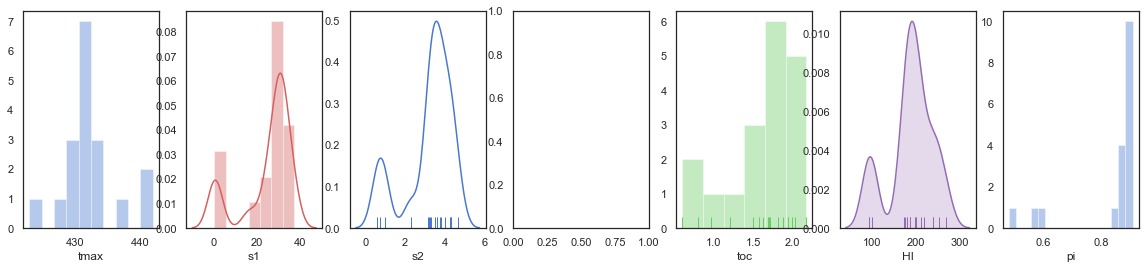

In [34]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 7, figsize=(20, 4))

# Plot a simple histogram with binsize determined automatically
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['tmax'], kde=False, color="b", ax=axes[0])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['s1'], kde=True, color="r", ax=axes[1])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['s2'], hist=False, kde=True, rug=True, color="b", ax=axes[2])
# sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['s3'], kde=False, color="b", ax=axes[3])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['toc'], kde=False, rug=True, color="g", ax=axes[4])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['HI'], hist=False, kde=True, rug=True, kde_kws={"shade": True}, color="m", ax=axes[5])
sns.distplot(merge[ merge['Period'] == 'CENOMANIAN']['pi'], kde=False, color="b", ax=axes[6])



### 2D plot of s3 against depth for one well (6406/2-1) with 3rd and 4th dimensions of Period and HI

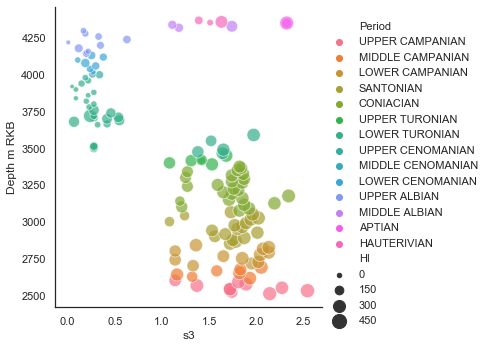

In [35]:
sns.relplot(y='Depth m RKB', x='s3', data=merge[merge['Well']=='406/2-1'], hue='Period', size='HI',sizes=(20,200), alpha=0.7)

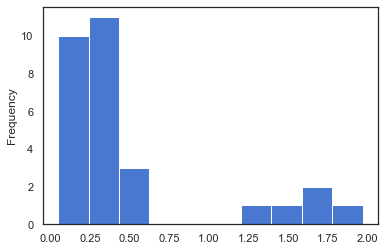

In [36]:
merge[ (merge['Well']=='406/2-1') & (merge['Period']=='LOWER TURONIAN')]['s3'].plot(kind='hist')